Differential expression analysis

**Need to run `prepare_data` first**

**Table of content**
1. [Testing how the complexification of the model explain the data](#Testing-how-the-complexification-of-the-model-explain-the-data)
2. [Build the DESeqDataSetFromMatrix object](#Build-the-DESeqDataSetFromMatrix-object)
2. [Exploratory analysis and visualization](#Exploratory-analysis-and-visualization)
3. [Differential expression analysis](#Differential-expression-analysis)
4. [Exploratory analysis and visualization, after removing some SPF, 104w, M samples](#Exploratory-analysis-and-visualization,-after-removing-some-SPF,-104w,-M-samples)
5. [Differential expression analysis, after removing some SPF, 104w, M samples](#Differential-expression-analysis,-after-removing-some-SPF,-104w,-M-samples)

*Generated from a Jupyter Notebook - [Sources](https://github.com/bebatut/neuromac_GF_mices/blob/master/src/dge_analysis.ipynb)*

# Load
## Libraries and functions

In [1]:
source("load_libraries.R")

Warning message:
“package ‘reshape2’ was built under R version 3.6.3”
Warning message:
“package ‘XML’ was built under R version 3.6.3”


Allowing multi-threading with up to 4 threads.


Warning message:
“package ‘reshape’ was built under R version 3.6.3”
Warning message:
“package ‘plotly’ was built under R version 3.6.3”
Warning message:
“package ‘tibble’ was built under R version 3.6.3”
Warning message:
“package ‘factoextra’ was built under R version 3.6.3”
Warning message:
“package ‘ggrepel’ was built under R version 3.6.3”
preparing gene to GO mapping data...

preparing IC data...

preparing gene to GO mapping data...

preparing IC data...

preparing gene to GO mapping data...

preparing IC data...



In [2]:
source("functions.R")

## Get the data

In [3]:
load("../results/dge/metadata.RData")
load("../results/dge/prepared_counts.RData")

# Testing how the complexification of the model explain the data

- Test of the addition of each factor and interactions
- Extraction of the number and percentage of genes with a significant p-values (< 0.05) for the Likelihood Ratio Tests

In [4]:
complexif_stats = dplyr::data_frame(
    Design=character(),
    Reduced=character(),
    Tested=character(),
    Gene_nb=numeric(),
    Gene_perc=numeric())

In [5]:
# Design: project
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ project)
dge = DESeq(dds, test="LRT", reduced = ~ 1)
LRT_res = results(dge, alpha=0.05)
nb = get_sign_padj(LRT_res)
complexif_stats = complexif_stats %>%
    add_row(Design="project", Reduced="1", Tested="project", Gene_nb=nb, Gene_perc=100*nb/dim(LRT_res)[1])

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 224 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [6]:
# Design: Sex
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ Sex)
dge = DESeq(dds, test="LRT", reduced = ~ 1)
LRT_res = results(dge, alpha=0.05)
nb = get_sign_padj(LRT_res)
complexif_stats = complexif_stats %>%
    add_row(Design="Sex", Reduced="1", Tested="Sex", Gene_nb=nb, Gene_perc=100*nb/dim(LRT_res)[1])

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 672 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [7]:
# Design: Microbiota
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ Microbiota)
dge = DESeq(dds, test="LRT", reduced = ~ 1)
LRT_res = results(dge, alpha=0.05)
nb = get_sign_padj(LRT_res)
complexif_stats = complexif_stats %>%
    add_row(Design="Microbiota", Reduced="1", Tested="Microbiota", Gene_nb=nb, Gene_perc=100*nb/dim(LRT_res)[1])

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 688 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [8]:
# Design: Age
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ Age)
dge = DESeq(dds, test="LRT", reduced = ~ 1)
LRT_res = results(dge, alpha=0.05)
nb = get_sign_padj(LRT_res)
complexif_stats = complexif_stats %>%
    add_row(Design="Age", Reduced="1", Tested="Age", Gene_nb=nb, Gene_perc=100*nb/dim(LRT_res)[1])

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 624 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [9]:
# Design: Sex + Microbiota
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ Sex + Microbiota)
dge = DESeq(dds, test="LRT", reduced = ~ Sex)
LRT_res = results(dge, alpha=0.05)
nb = get_sign_padj(LRT_res)
complexif_stats = complexif_stats %>%
    add_row(Design="Sex + Microbiota", Reduced="Sex", Tested="Microbiota", Gene_nb=nb, Gene_perc=100*nb/dim(LRT_res)[1])

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 734 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [10]:
# Design: Sex + Age
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ Sex + Age)
dge = DESeq(dds, test="LRT", reduced = ~ Sex)
LRT_res = results(dge, alpha=0.05)
nb = get_sign_padj(LRT_res)
complexif_stats = complexif_stats %>%
    add_row(Design="Sex + Age", Reduced="Sex", Tested="Age", Gene_nb=nb, Gene_perc=100*nb/dim(LRT_res)[1])

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 496 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [11]:
# Design: Microbiota + Sex
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ Microbiota + Sex)
dge = DESeq(dds, test="LRT", reduced = ~ Microbiota)
LRT_res = results(dge, alpha=0.05)
nb = get_sign_padj(LRT_res)
complexif_stats = complexif_stats %>%
    add_row(Design="Microbiota + Sex", Reduced="Microbiota", Tested="Sex", Gene_nb=nb, Gene_perc=100*nb/dim(LRT_res)[1])

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 734 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [12]:
# Design: Microbiota + Age
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ Microbiota + Age)
dge = DESeq(dds, test="LRT", reduced = ~ Microbiota)
LRT_res = results(dge, alpha=0.05)
nb = get_sign_padj(LRT_res)
complexif_stats = complexif_stats %>%
    add_row(Design="Microbiota + Age", Reduced="Microbiota", Tested="Age", Gene_nb=nb, Gene_perc=100*nb/dim(LRT_res)[1])

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 514 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [13]:
# Design: Age + Sex
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ Age + Sex)
dge = DESeq(dds, test="LRT", reduced = ~ Age)
LRT_res = results(dge, alpha=0.05)
nb = get_sign_padj(LRT_res)
complexif_stats = complexif_stats %>%
    add_row(Design="Age + Sex", Reduced="Age", Tested="Sex", Gene_nb=nb, Gene_perc=100*nb/dim(LRT_res)[1])

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 496 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [14]:
# Design: Age + Microbiota
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ Age + Microbiota)
dge = DESeq(dds, test="LRT", reduced = ~ Age)
LRT_res = results(dge, alpha=0.05)
nb = get_sign_padj(LRT_res)
complexif_stats = complexif_stats %>%
    add_row(Design="Age + Microbiota", Reduced="Age", Tested="Microbiota", Gene_nb=nb, Gene_perc=100*nb/dim(LRT_res)[1])

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 514 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [15]:
# Design: Sex + Microbiota + Sex:Microbiota
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ Sex + Microbiota + Sex:Microbiota)
dge = DESeq(dds, test="LRT", reduced = ~ Sex + Microbiota)
LRT_res = results(dge, alpha=0.05)
nb = get_sign_padj(LRT_res)
complexif_stats = complexif_stats %>%
    add_row(Design="Sex + Microbiota + Sex:Microbiota", Reduced="Sex + Microbiota", Tested="Sex:Microbiota", Gene_nb=nb, Gene_perc=100*nb/dim(LRT_res)[1])

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 565 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [16]:
# Design: Sex + Age + Sex:Age
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ Sex + Age + Sex:Age)
dge = DESeq(dds, test="LRT", reduced = ~ Sex + Age)
LRT_res = results(dge, alpha=0.05)
nb = get_sign_padj(LRT_res)
complexif_stats = complexif_stats %>%
    add_row(Design="Sex + Age + Sex:Age", Reduced="Sex + Age", Tested="Sex:Ag", Gene_nb=nb, Gene_perc=100*nb/dim(LRT_res)[1])

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 285 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [17]:
# Design: Microbiota + Age + Microbiota:Age
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ Microbiota + Age + Microbiota:Age)
dge = DESeq(dds, test="LRT", reduced = ~ Microbiota + Age)
LRT_res = results(dge, alpha=0.05)
nb = get_sign_padj(LRT_res)
complexif_stats = complexif_stats %>%
    add_row(Design="Microbiota + Age + Microbiota:Age", Reduced="Microbiota + Age", Tested="Microbiota:Age", Gene_nb=nb, Gene_perc=100*nb/dim(LRT_res)[1])

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 310 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [18]:
# Design: Sex + Microbiota + Age
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ Sex + Microbiota + Age)
dge = DESeq(dds, test="LRT", reduced = ~ Sex + Microbiota)
LRT_res = results(dge, alpha=0.05)
nb = get_sign_padj(LRT_res)
complexif_stats = complexif_stats %>%
    add_row(Design="Sex + Microbiota + Age", Reduced="Sex + Microbiota", Tested="Age", Gene_nb=nb, Gene_perc=100*nb/dim(LRT_res)[1])

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 325 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [19]:
# Design: Sex + Microbiota + Age
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ Sex + Microbiota + Age)
dge = DESeq(dds, test="LRT", reduced = ~ Sex + Age)
LRT_res = results(dge, alpha=0.05)
nb = get_sign_padj(LRT_res)
complexif_stats = complexif_stats %>%
    add_row(Design="Sex + Microbiota + Age", Reduced="Sex + Age", Tested="Microbiota", Gene_nb=nb, Gene_perc=100*nb/dim(LRT_res)[1])

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 325 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [20]:
# Design: Sex + Microbiota + Age
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ Sex + Microbiota + Age)
dge = DESeq(dds, test="LRT", reduced = ~ Microbiota + Age)
LRT_res = results(dge, alpha=0.05)
nb = get_sign_padj(LRT_res)
complexif_stats = complexif_stats %>%
    add_row(Design="Sex + Microbiota + Age", Reduced="Microbiota + Age", Tested="Sex", Gene_nb=nb, Gene_perc=100*nb/dim(LRT_res)[1])

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 325 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [21]:
# Design: Sex + Microbiota + Age + Sex:Microbiota
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ Sex + Microbiota + Age + Sex:Microbiota)
dge = DESeq(dds, test="LRT", reduced = ~ Sex + Microbiota + Age)
LRT_res = results(dge, alpha=0.05)
nb = get_sign_padj(LRT_res)
complexif_stats = complexif_stats %>%
    add_row(
        Design="Sex + Microbiota + Age + Sex:Microbiota",
        Reduced="Sex + Microbiota + Age",
        Tested="Sex:Microbiota",
        Gene_nb=nb,
        Gene_perc=100*nb/dim(LRT_res)[1])

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 283 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [22]:
# Design: Sex + Microbiota + Age + Sex:Age
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ Sex + Microbiota + Age + Sex:Age)
dge = DESeq(dds, test="LRT", reduced = ~ Sex + Microbiota + Age)
LRT_res = results(dge, alpha=0.05)
nb = get_sign_padj(LRT_res)
complexif_stats = complexif_stats %>%
    add_row(
        Design="Sex + Microbiota + Age + Sex:Age",
        Reduced="Sex + Microbiota + Age",
        Tested="Sex:Age",
        Gene_nb=nb,
        Gene_perc=100*nb/dim(LRT_res)[1])

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 192 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [23]:
# Design: Sex + Microbiota + Age + Microbiota:Age
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ Sex + Microbiota + Age + Microbiota:Age)
dge = DESeq(dds, test="LRT", reduced = ~ Sex + Microbiota + Age)
LRT_res = results(dge, alpha=0.05)
nb = get_sign_padj(LRT_res)
complexif_stats = complexif_stats %>%
    add_row(
        Design="Sex + Microbiota + Age + Microbiota:Age",
        Reduced="Sex + Microbiota + Age",
        Tested="Microbiota:Age",
        Gene_nb=nb,
        Gene_perc=100*nb/dim(LRT_res)[1])

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 207 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [24]:
# Design: Sex + Microbiota + Age + Sex:Microbiota + Sex:Age
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ Sex + Microbiota + Age + Sex:Microbiota + Sex:Age)
dge = DESeq(dds, test="LRT", reduced = ~ Sex + Microbiota + Age + Sex:Microbiota)
LRT_res = results(dge, alpha=0.05)
nb = get_sign_padj(LRT_res)
nb = get_sign_padj(LRT_res)
complexif_stats = complexif_stats %>%
    add_row(
        Design="Sex + Microbiota + Age + Sex:Microbiota + Sex:Age",
        Reduced="Sex + Microbiota + Age + Sex:Microbiota",
        Tested="Sex:Age",
        Gene_nb=nb,
        Gene_perc=100*nb/dim(LRT_res)[1])

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 201 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [25]:
# Design: Sex + Microbiota + Age + Sex:Microbiota + Sex:Age
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ Sex + Microbiota + Age + Sex:Microbiota + Sex:Age)
dge = DESeq(dds, test="LRT", reduced = ~ Sex + Microbiota + Age + Sex:Age)
LRT_res = results(dge, alpha=0.05)
nb = get_sign_padj(LRT_res)
complexif_stats = complexif_stats %>%
    add_row(
        Design="Sex + Microbiota + Age + Sex:Microbiota + Sex:Age",
        Reduced="Sex + Microbiota + Age + Sex:Age",
        Tested="Sex:Microbiota",
        Gene_nb=nb,
        Gene_perc=100*nb/dim(LRT_res)[1])

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 201 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [26]:
# Design: Sex + Microbiota + Age + Sex:Microbiota + Microbiota:Age
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ Sex + Microbiota + Age + Sex:Microbiota + Microbiota:Age)
dge = DESeq(dds, test="LRT", reduced = ~ Sex + Microbiota + Age + Sex:Microbiota)
LRT_res = results(dge, alpha=0.05)
nb = get_sign_padj(LRT_res)
complexif_stats = complexif_stats %>%
    add_row(
        Design="Sex + Microbiota + Age + Sex:Microbiota + Microbiota:Age",
        Reduced="Sex + Microbiota + Age + Sex:Microbiota",
        Tested="Microbiota:Age",
        Gene_nb=nb,
        Gene_perc=100*nb/dim(LRT_res)[1])

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
1 rows did not converge in beta, labelled in mcols(object)$fullBetaConv. Use larger maxit argument with nbinomLRT
-- replacing outliers and refitting for 198 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [27]:
# Design: Sex + Microbiota + Age + Sex:Microbiota + Microbiota:Age
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ Sex + Microbiota + Age + Sex:Microbiota + Microbiota:Age)
dge = DESeq(dds, test="LRT", reduced = ~ Sex + Microbiota + Age + Microbiota:Age)
LRT_res = results(dge, alpha=0.05)
nb = get_sign_padj(LRT_res)
complexif_stats = complexif_stats %>%
    add_row(
        Design="Sex + Microbiota + Age + Sex:Microbiota + Microbiota:Age",
        Reduced="Sex + Microbiota + Age + Microbiota:Age",
        Tested="Sex:Microbiota",
        Gene_nb=nb,
        Gene_perc=100*nb/dim(LRT_res)[1])

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
1 rows did not converge in beta, labelled in mcols(object)$fullBetaConv. Use larger maxit argument with nbinomLRT
-- replacing outliers and refitting for 198 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [28]:
# Design: Sex + Microbiota + Age + Sex:Age + Microbiota:Age
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ Sex + Microbiota + Age + Sex:Age + Microbiota:Age)
dge = DESeq(dds, test="LRT", reduced = ~ Sex + Microbiota + Age + Sex:Age)
LRT_res = results(dge, alpha=0.05)
nb = get_sign_padj(LRT_res)
complexif_stats = complexif_stats %>%
    add_row(
        Design="Sex + Microbiota + Age + Sex:Age + Microbiota:Age",
        Reduced="Sex + Microbiota + Age + Sex:Age",
        Tested="Microbiota:Age",
        Gene_nb=nb,
        Gene_perc=100*nb/dim(LRT_res)[1])

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
3 rows did not converge in beta, labelled in mcols(object)$fullBetaConv. Use larger maxit argument with nbinomLRT
-- replacing outliers and refitting for 177 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [29]:
# Design: Sex + Microbiota + Age + Sex:Age + Microbiota:Age
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ Sex + Microbiota + Age + Sex:Age + Microbiota:Age)
dge = DESeq(dds, test="LRT", reduced = ~ Sex + Microbiota + Age + Microbiota:Age)
LRT_res = results(dge, alpha=0.05)
nb = get_sign_padj(LRT_res)
complexif_stats = complexif_stats %>%
    add_row(
        Design="Sex + Microbiota + Age + Sex:Age + Microbiota:Age",
        Reduced="Sex + Microbiota + Age + Microbiota:Age",
        Tested="Sex:Age",
        Gene_nb=nb,
        Gene_perc=100*nb/dim(LRT_res)[1])

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
3 rows did not converge in beta, labelled in mcols(object)$fullBetaConv. Use larger maxit argument with nbinomLRT
-- replacing outliers and refitting for 177 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [30]:
# Design: Sex + Microbiota + Age + Sex:Microbiota + Sex:Age + Microbiota:Age
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ Sex + Microbiota + Age + Sex:Microbiota + Sex:Age + Microbiota:Age)
dge = DESeq(dds, test="LRT", reduced = ~ Sex + Microbiota + Age + Sex:Microbiota + Sex:Age)
LRT_res = results(dge, alpha=0.05)
nb = get_sign_padj(LRT_res)
complexif_stats = complexif_stats %>%
    add_row(
        Design="Sex + Microbiota + Age + Sex:Microbiota + Sex:Age + Microbiota:Age",
        Reduced="Sex + Microbiota + Age + Sex:Microbiota + Sex:Age",
        Tested="Microbiota:Age",
        Gene_nb=nb,
        Gene_perc=100*nb/dim(LRT_res)[1])

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
4 rows did not converge in beta, labelled in mcols(object)$fullBetaConv. Use larger maxit argument with nbinomLRT
-- replacing outliers and refitting for 162 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [31]:
# Design: Sex + Microbiota + Age + Sex:Microbiota + Sex:Age + Microbiota:Age
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ Sex + Microbiota + Age + Sex:Microbiota + Sex:Age + Microbiota:Age)
dge = DESeq(dds, test="LRT", reduced = ~ Sex + Microbiota + Age + Sex:Microbiota + Microbiota:Age)
LRT_res = results(dge, alpha=0.05)
nb = get_sign_padj(LRT_res)
complexif_stats = complexif_stats %>%
    add_row(
        Design="Sex + Microbiota + Age + Sex:Microbiota + Sex:Age + Microbiota:Age",
        Reduced="Sex + Microbiota + Age + Sex:Microbiota + Microbiota:Age",
        Tested="Sex:Age",
        Gene_nb=nb,
        Gene_perc=100*nb/dim(LRT_res)[1])

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
4 rows did not converge in beta, labelled in mcols(object)$fullBetaConv. Use larger maxit argument with nbinomLRT
-- replacing outliers and refitting for 162 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [32]:
# Design: Sex + Microbiota + Age + Sex:Microbiota + Sex:Age + Microbiota:Age
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ Sex + Microbiota + Age + Sex:Microbiota + Sex:Age + Microbiota:Age)
dge = DESeq(dds, test="LRT", reduced = ~ Sex + Microbiota + Age + Sex:Age + Microbiota:Age)
LRT_res = results(dge, alpha=0.05)
nb = get_sign_padj(LRT_res)
complexif_stats = complexif_stats %>%
    add_row(
        Design="Sex + Microbiota + Age + Sex:Microbiota + Sex:Age + Microbiota:Age",
        Reduced="Sex + Microbiota + Age + Sex:Age + Microbiota:Age",
        Tested="Sex:Microbiota",
        Gene_nb=nb,
        Gene_perc=100*nb/dim(LRT_res)[1])

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
4 rows did not converge in beta, labelled in mcols(object)$fullBetaConv. Use larger maxit argument with nbinomLRT
-- replacing outliers and refitting for 162 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


Genes with a significant p-values (< 0.05) for the Likelihood Ratio Tests 

In [33]:
complexif_stats %>%
    rename('Genes with significant LRT adjusted p-value' = Gene_nb) %>%
    rename('% genes with significant LRT adjusted p-value' = Gene_perc)

Design,Reduced,Tested,Genes with significant LRT adjusted p-value,% genes with significant LRT adjusted p-value
project,1,project,9664,49.0707830
Sex,1,Sex,3474,17.6398903
Microbiota,1,Microbiota,2525,12.8211638
Age,1,Age,3212,16.3095359
Sex + Microbiota,Sex,Microbiota,2393,12.1509089
Sex + Age,Sex,Age,4445,22.5703260
Microbiota + Sex,Microbiota,Sex,3338,16.9493247
Microbiota + Age,Microbiota,Age,3363,17.0762669
Age + Sex,Age,Sex,4445,22.5703260
Age + Microbiota,Age,Microbiota,2723,13.8265462


Percentage of variables' effect on transcriptomic profile

In [34]:
complexif_stats %>%
    group_by(Tested) %>%
    select(c(Tested, Gene_perc)) %>%
    summarise_all(funs(min(.),max(.)))

Tested,min,max
Age,16.3095359,23.8245151
Microbiota,12.1509089,13.8265462
Microbiota:Age,1.9549101,3.4680613
project,49.0707830,49.0707830
Sex,16.9493247,22.5906367
Sex:Ag,11.6431400,11.6431400
Sex:Age,12.6231339,13.5675840
Sex:Microbiota,0.1675637,0.5230019


Factor | Percentage of genes with LRT adjusted p-value < 0.05
--- | ---
Age | 16.31% - 23.82%
Sex | 16.95% - 22.59%
Microbiota | 12.15% - 13.83%
Sex:Age | 11.64% - 13.57%
Microbiota:Age | 1.95% - 3.47%
Sex:Microbiota | 0.17% - 0.52%

# Build the DESeqDataSetFromMatrix object

Construct DESeqDataSet and organize levels of the factors (8w being the reference)

In [35]:
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ Sex + Microbiota + Age + Sex:Age + Sex:Microbiota + Microbiota:Age)
dds$Age = relevel(dds$Age, ref="Young")
dds$Microbiota = relevel(dds$Microbiota, ref="SPF")
dds$Sex = relevel(dds$Sex, ref="Female")

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”

# Exploratory analysis and visualization

We use here the variance stabilizing transformation 

In [36]:
vsd = vst(dds, blind = FALSE)

Distances between the samples

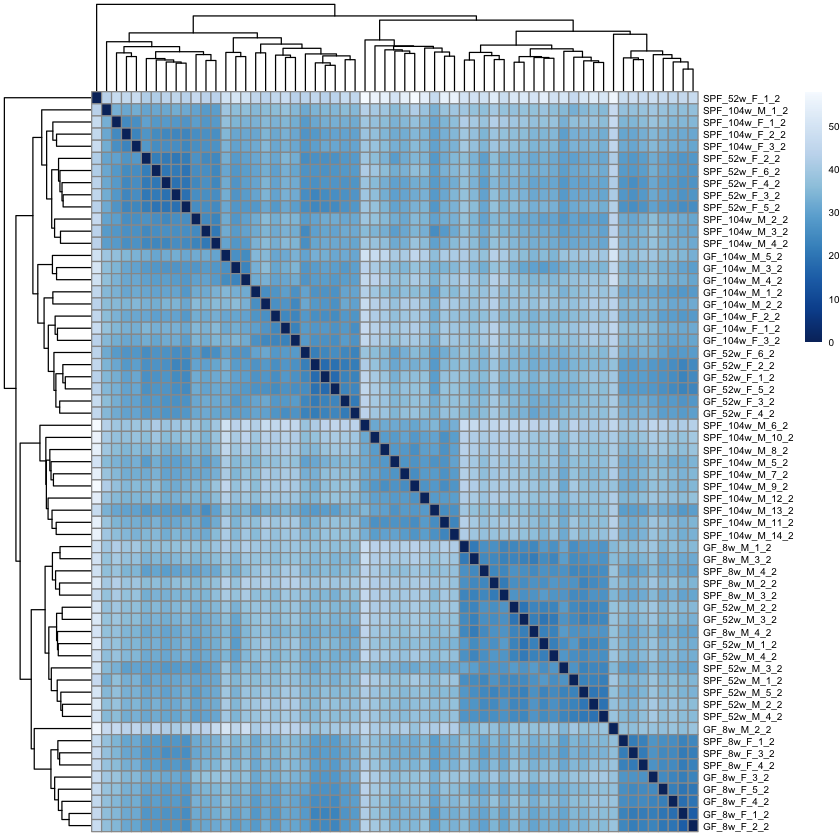

In [37]:
sampleDists = dist(t(assay(vsd)))
sampleDistMatrix = as.matrix( sampleDists )
colnames(sampleDistMatrix) = NULL
colors = colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows = sampleDists,
         clustering_distance_cols = sampleDists,
         col = colors,
         fontsize = 6)

PCA plot 

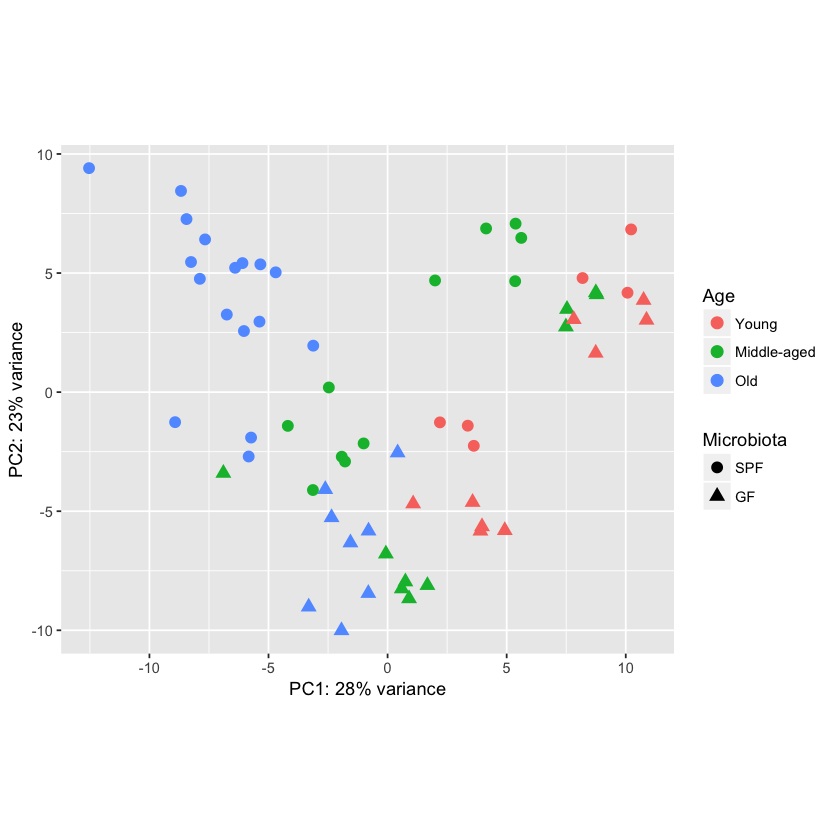

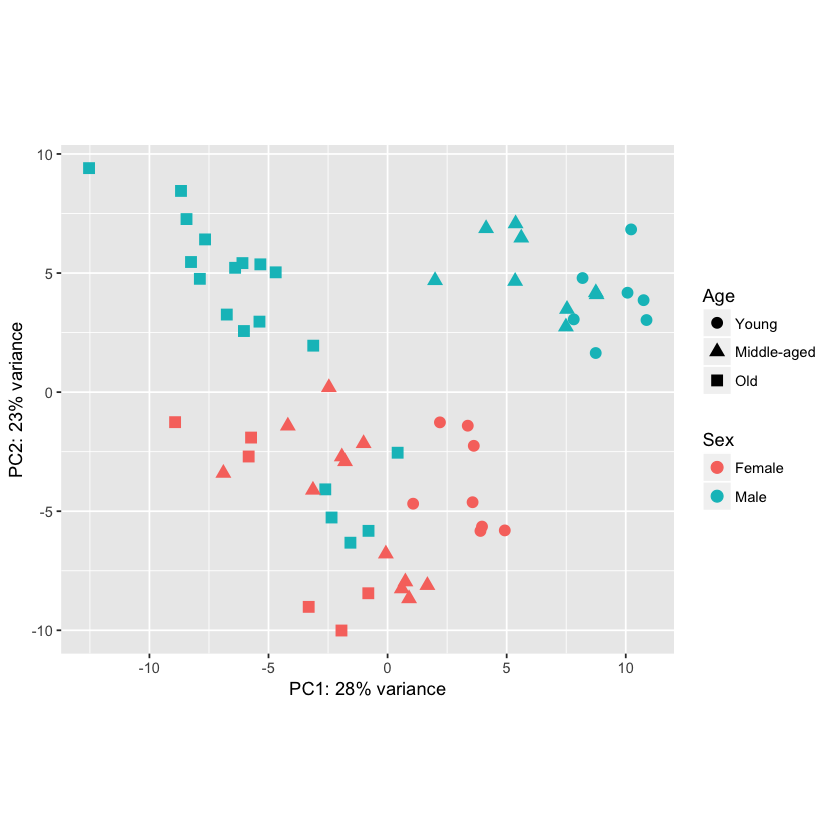

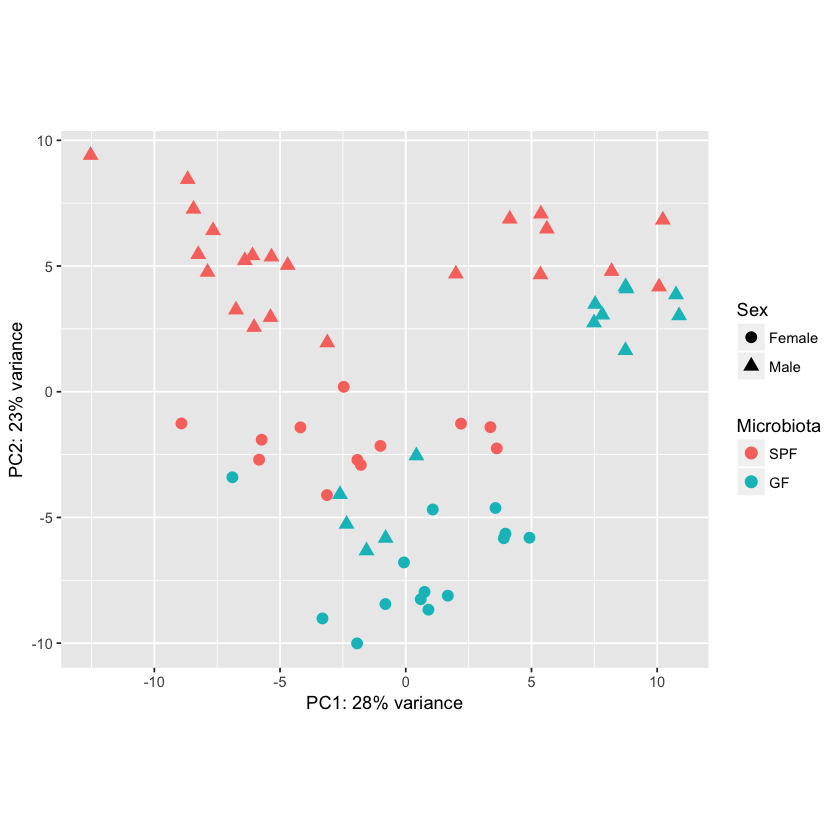

In [38]:
pcaData = plotPCA(vsd, intgroup = c( "Microbiota", "Sex", "Age"), returnData = TRUE)
percentVar = round(100 * attr(pcaData, "percentVar"))
ggplot(pcaData, aes(x = PC1, y = PC2, color = Age, shape = Microbiota)) +
  geom_point(size =3) +
  xlab(paste0("PC1: ", percentVar[1], "% variance")) +
  ylab(paste0("PC2: ", percentVar[2], "% variance")) +
  coord_fixed()
ggplot(pcaData, aes(x = PC1, y = PC2, color = Sex, shape = Age)) +
  geom_point(size =3) +
  xlab(paste0("PC1: ", percentVar[1], "% variance")) +
  ylab(paste0("PC2: ", percentVar[2], "% variance")) +
  coord_fixed()
ggplot(pcaData, aes(x = PC1, y = PC2, color = Microbiota, shape = Sex)) +
  geom_point(size =3) +
  xlab(paste0("PC1: ", percentVar[1], "% variance")) +
  ylab(paste0("PC2: ", percentVar[2], "% variance")) +
  coord_fixed()

Batch effect

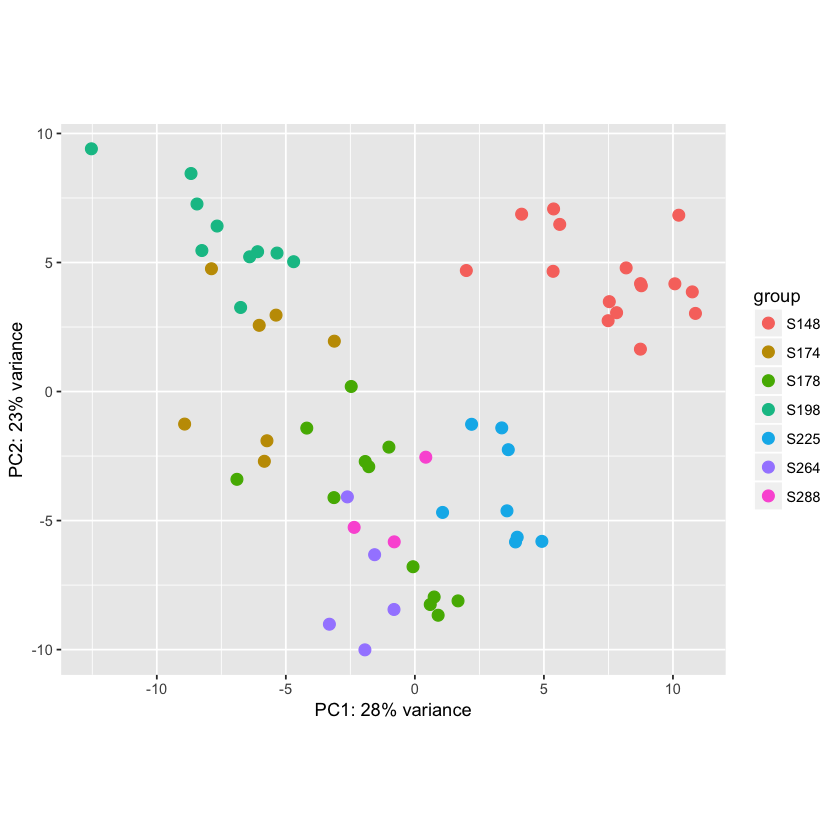

In [39]:
plotPCA(vsd, intgroup = "project")

# Differential expression analysis

In [40]:
dge = DESeq(dds)
save(dge, file = "../results/dge/dge.RData")

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
8 rows did not converge in beta, labelled in mcols(object)$betaConv. Use larger maxit argument with nbinomWaldTest
-- replacing outliers and refitting for 161 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing
1 rows did not converge in beta, labelled in mcols(object)$betaConv. Use larger maxit argument with nbinomWaldTest


Extract and save the normalized counts

In [41]:
norm_counts = counts(dge, normalized = TRUE)
save(norm_counts, file="../results/dge/norm_counts.RData")
write.table(norm_counts, "../results/dge/norm_counts", sep = "\t", quote = FALSE)

Extract and save the Z-scores

In [42]:
mean_counts = apply(norm_counts, 1, mean)
sd_counts = apply(norm_counts, 1, sd)
z_scores = (norm_counts - mean_counts)/sd_counts
save(z_scores, file="../results/dge/z_scores.RData")
write.table(z_scores, "../results/dge/z_scores", sep = "\t", quote = FALSE)

Extract some statistics about the Z-scores
1. Full dimension of Z-scores matrix
2. Z-score higher than 3.5 or smaller than -3.5
3. Percentage of Z-score higher than 3.5 or smaller than -3.5

In [43]:
dim(z_scores)
# z_score higher than 3.5 or smaller than -3.5
s = data.frame("z_scores > 3.5" = apply(z_scores > 3.5, 2, sum, na.rm = T), "z_scores < -3.5" = apply(z_scores < -3.5, 2, sum, na.rm = T))
t(s)
s_perc = 100 * s/dim(norm_counts)[1]
t(s_perc)
data.frame(number = apply(s,2,sum),
           minimum_percentage = apply(s_perc,2,min),
           maximum_percentage = apply(s_perc,2,max),
           row.names = c("z_scores > 3.5", "z_scores < -3.5"))

[1] 19694    61

,GF_104w_F_1_2,GF_104w_F_2_2,GF_104w_F_3_2,GF_104w_M_1_2,GF_104w_M_2_2,GF_104w_M_3_2,GF_104w_M_4_2,GF_104w_M_5_2,GF_52w_F_1_2,GF_52w_F_2_2,⋯,SPF_52w_M_2_2,SPF_52w_M_3_2,SPF_52w_M_4_2,SPF_52w_M_5_2,SPF_8w_F_1_2,SPF_8w_F_3_2,SPF_8w_F_4_2,SPF_8w_M_2_2,SPF_8w_M_3_2,SPF_8w_M_4_2
z_scores...3.5,173,144,130,180,251,203,184,257,84,71,⋯,253,138,260,231,127,108,129,338,305,138
z_scores....3.5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


,GF_104w_F_1_2,GF_104w_F_2_2,GF_104w_F_3_2,GF_104w_M_1_2,GF_104w_M_2_2,GF_104w_M_3_2,GF_104w_M_4_2,GF_104w_M_5_2,GF_52w_F_1_2,GF_52w_F_2_2,⋯,SPF_52w_M_2_2,SPF_52w_M_3_2,SPF_52w_M_4_2,SPF_52w_M_5_2,SPF_8w_F_1_2,SPF_8w_F_3_2,SPF_8w_F_4_2,SPF_8w_M_2_2,SPF_8w_M_3_2,SPF_8w_M_4_2
z_scores...3.5,0.8784401,0.7311872,0.6600995,0.913984,1.2745,1.030771,0.9342947,1.304966,0.4265258,0.3605159,⋯,1.284655,0.700721,1.320199,1.172946,0.6448665,0.5483904,0.6550218,1.716259,1.548695,0.700721
z_scores....3.5,0.0000000,0.0000000,0.0000000,0.000000,0.0000,0.000000,0.0000000,0.000000,0.0000000,0.0000000,⋯,0.000000,0.000000,0.000000,0.000000,0.0000000,0.0000000,0.0000000,0.000000,0.000000,0.000000


,number,minimum_percentage,maximum_percentage
z_scores > 3.5,12452,0.3300498,4.1586270
z_scores < -3.5,86,0.0000000,0.3046613


Contrasts (factors)

In [44]:
contrast_names = resultsNames(dge)
contrast_names = gsub("Middle.aged", "Middle-aged", contrast_names)
contrast_names = gsub("^(Sex|Age|Microbiota)_", "", contrast_names)
contrast_names = gsub("\\.(Sex|Age|Microbiota)", " & ", contrast_names)
contrast_names = gsub("(Sex|Age|Microbiota)", "", contrast_names)
contrast_names = gsub("_", " ", contrast_names)
contrast_names

[1] "Intercept"            "Male vs Female"       "GF vs SPF"           
 [4] "Middle-aged vs Young" "Old vs Young"         "Male & Middle-aged"  
 [7] "Male & Old"           "Male & GF"            "GF & Middle-aged"    
[10] "GF & Old"

In [45]:
contrasts = as.data.frame(matrix(
        nrow=0,
        ncol=length(contrast_names)+1)) %>%
    rbind(c("Male vs Female (SPF, Young)", 0, 1, rep(0, 8))) %>%
    rename_all(funs(c("Info", contrast_names))) %>%
    rbind(c("Male vs Female (GF, Young)", 0, 1, rep(0, 5), 1, rep(0, 2))) %>%
    rbind(c("Male vs Female (SPF, Middle-aged)", 0, 1, rep(0, 3), 1, rep(0, 4))) %>%
    rbind(c("Male vs Female (GF, Middle-aged)", 0, 1, rep(0, 3), 1, 0, 1, rep(0, 2))) %>%
    rbind(c("Male vs Female (SPF, Old)", 0, 1, rep(0, 4), 1, rep(0, 3))) %>%
    rbind(c("Male vs Female (GF, Old)", 0, 1, rep(0, 4), 1, 1, rep(0, 2))) %>%
    rbind(c("Male vs Female (SPF)", 0, 1, rep(0, 3), 1/3, 1/3, rep(0, 3))) %>%
    rbind(c("Male vs Female (GF)", 0, 1, rep(0, 3), 1/3, 1/3, 1, rep(0, 2))) %>%
    rbind(c("Male vs Female (Young)", 0, 1, rep(0, 5), 1/2, rep(0, 2))) %>%
    rbind(c("Male vs Female (Middle-aged)", 0, 1, rep(0, 3), 1, 0, 1/2, rep(0, 2))) %>%
    rbind(c("Male vs Female (Old)", 0, 1, rep(0, 4), 1, 1/2, rep(0, 2))) %>%
    rbind(c("Male vs Female", 0, 1, rep(0, 3), 1/3, 1/3, 1/2, rep(0, 2))) %>%
    rbind(c("GF vs SPF (Female, Young)", rep(0, 2), 1, rep(0, 7))) %>%
    rbind(c("GF vs SPF (Male, Young)", rep(0, 2), 1, rep(0, 4), 1, rep(0, 2))) %>%
    rbind(c("GF vs SPF (Female, Middle-aged)", rep(0, 2), 1, rep(0, 5), 1, 0)) %>%
    rbind(c("GF vs SPF (Male, Middle-aged)", rep(0, 2), 1, rep(0, 4), 1, 1, 0)) %>%
    rbind(c("GF vs SPF (Female, Old)", rep(0, 2), 1, rep(0, 6), 1)) %>%
    rbind(c("GF vs SPF (Male, Old)", rep(0, 2), 1, rep(0, 4), 1, 0, 1)) %>%
    rbind(c("GF vs SPF (Female)", rep(0, 2), 1, rep(0, 5), 1/3, 1/3)) %>%
    rbind(c("GF vs SPF (Male)", rep(0, 2), 1, rep(0, 4), 1, 1/3, 1/3)) %>%
    rbind(c("GF vs SPF (Young)", rep(0, 2), 1, rep(0, 4), 1/2, rep(0, 2))) %>%
    rbind(c("GF vs SPF (Middle-aged)", rep(0, 2), 1, rep(0, 4), 1/2, 1, 0)) %>%
    rbind(c("GF vs SPF (Old)", rep(0, 2), 1, rep(0, 4), 1/2, 0, 1)) %>%
    rbind(c("GF vs SPF", rep(0, 2), 1 , rep(0, 4), 1/2, 1/3, 1/3)) %>%
    rbind(c("Middle-aged vs Young (Female, SPF)", rep(0, 3), 1, rep(0, 6))) %>%
    rbind(c("Middle-aged vs Young (Female, GF)", rep(0, 3),1, rep(0, 4), 1, 0)) %>%
    rbind(c("Middle-aged vs Young (Male, SPF)", rep(0, 3), 1, 0, 1, rep(0, 4))) %>%
    rbind(c("Middle-aged vs Young (Male, GF)", rep(0, 3), 1, 0, 1, rep(0, 2), 1, 0)) %>%
    rbind(c("Middle-aged vs Young (Female)", rep(0, 3), 1, rep(0, 4), 1/2, 0)) %>%
    rbind(c("Middle-aged vs Young (Male)", rep(0, 3), 1, 0, 1, rep(0, 2), 1/2, 0)) %>%
    rbind(c("Middle-aged vs Young (SPF)", rep(0, 3), 1, 0, 1/2, rep(0, 4))) %>%
    rbind(c("Middle-aged vs Young (GF)", rep(0, 3), 1, 0, 1/2, rep(0, 2), 1, 0)) %>%
    rbind(c("Middle-aged vs Young", rep(0, 3), 1, 0, 1/2, rep(0, 2), 1/2, 0)) %>%
    rbind(c("Old vs Young (Female, SPF)", rep(0, 4), 1, rep(0, 5))) %>%
    rbind(c("Old vs Young (Female, GF)", rep(0, 4), 1, rep(0, 4), 1)) %>%
    rbind(c("Old vs Young (Male, SPF)", rep(0, 4), 1, 0, 1, rep(0, 3))) %>%
    rbind(c("Old vs Young (Male, GF)", rep(0, 4), 1, 0, 1, rep(0, 2), 1)) %>%
    rbind(c("Old vs Young (Female)", rep(0, 4), 1, rep(0, 4), 1/2)) %>%
    rbind(c("Old vs Young (Male)", rep(0, 4), 1, 0, 1, rep(0, 2), 1/2)) %>%
    rbind(c("Old vs Young (SPF)", rep(0, 4), 1, 0, 1/2, rep(0, 3))) %>%
    rbind(c("Old vs Young (GF)", rep(0, 4), 1, 0, 1/2, rep(0, 2), 1)) %>%
    rbind(c("Old vs Young", rep(0, 4), 1, 0, 1/2, rep(0, 2), 1/2)) %>%
    rbind(c("Old vs Middle-aged (Female, SPF)", rep(0, 3), -1, 1, rep(0, 5))) %>%
    rbind(c("Old vs Middle-aged (Female, GF)", rep(0, 3), -1, 1, rep(0, 3), -1, 1)) %>%
    rbind(c("Old vs Middle-aged (Male, SPF)", rep(0, 3), -1, 1, -1, 1, rep(0, 3))) %>%
    rbind(c("Old vs Middle-aged (Male, GF)", rep(0, 3), -1, 1, -1, 1, 0, -1, 1)) %>%
    rbind(c("Old vs Middle-aged (Female)", rep(0, 3), -1, 1, rep(0, 3), -1/2, 1/2)) %>%
    rbind(c("Old vs Middle-aged (Male)", rep(0, 3), -1, 1, -1, 1, 0, -1/2, 1/2)) %>%
    rbind(c("Old vs Middle-aged (SPF)", rep(0, 3), -1, 1, -1/2, 1/2, rep(0, 3))) %>%
    rbind(c("Old vs Middle-aged (GF)", rep(0, 3), -1, 1, -1/2, 1/2, rep(0, 3))) %>%
    rbind(c("Old vs Middle-aged", rep(0, 3), -1, 1, -1/2, 1/2, 0, -1/2, 1/2))
contrasts
save(contrasts, file="../results/dge/contrasts.RData")

Info,Intercept,Male vs Female,GF vs SPF,Middle-aged vs Young,Old vs Young,Male & Middle-aged,Male & Old,Male & GF,GF & Middle-aged,GF & Old
"Male vs Female (SPF, Young)",0,1,0,0,0,0,0,0,0,0
"Male vs Female (GF, Young)",0,1,0,0,0,0,0,1,0,0
"Male vs Female (SPF, Middle-aged)",0,1,0,0,0,1,0,0,0,0
"Male vs Female (GF, Middle-aged)",0,1,0,0,0,1,0,1,0,0
"Male vs Female (SPF, Old)",0,1,0,0,0,0,1,0,0,0
"Male vs Female (GF, Old)",0,1,0,0,0,0,1,1,0,0
Male vs Female (SPF),0,1,0,0,0,0.333333333333333,0.333333333333333,0,0,0
Male vs Female (GF),0,1,0,0,0,0.333333333333333,0.333333333333333,1,0,0
Male vs Female (Young),0,1,0,0,0,0,0,0.5,0,0
Male vs Female (Middle-aged),0,1,0,0,0,1,0,0.5,0,0


# Citations

In [46]:
citation("DESeq2")


  Michael I Love, Wolfgang Huber and Simon Anders (2014): Moderated
  estimation of fold change and dispersion for RNA-Seq data with
  DESeq2. Genome Biology

A BibTeX entry for LaTeX users is

  @Article{,
    title = {Moderated estimation of fold change and dispersion for RNA-seq data with DESeq2},
    author = {Michael I Love and Wolfgang Huber and Simon Anders},
    year = {2014},
    journal = {Genome Biology},
    doi = {10.1186/s13059-014-0550-8},
    volume = {15},
    issue = {12},
    pages = {550},
  }
